In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
sns.set()


In [132]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [133]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
%matplotlib inline

In [136]:
DATAPATH = "C:/Users/nikit/Downloads/^NSEI.csv"


In [139]:
data = pd.read_csv(DATAPATH, index_col=['Date'], parse_dates=['Date'])
df = pd.DataFrame(data)
df.head(10)




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-09,7755.250000,7873.649902,7753.549805,7866.049805,7866.049805,160600.0
2016-05-10,7873.549805,7896.899902,7837.700195,7887.799805,7887.799805,162000.0
2016-05-11,7804.649902,7893.100098,7780.899902,7848.850098,7848.850098,214100.0
2016-05-12,7871.450195,7916.049805,7849.649902,7900.399902,7900.399902,152700.0
2016-05-13,7881.000000,7881.000000,7784.200195,7814.899902,7814.899902,179500.0
2016-05-16,7831.200195,7873.899902,7772.149902,7860.750000,7860.750000,205200.0
2016-05-17,7896.850098,7940.100098,7879.700195,7890.750000,7890.750000,183400.0
2016-05-18,7846.750000,7882.049805,7810.750000,7870.149902,7870.149902,156400.0
2016-05-19,7875.500000,7876.200195,7766.799805,7783.399902,7783.399902,170400.0


In [140]:
df.shape

(1235, 6)

In [141]:
df1 = df.dropna(how='all')
print(df1)

                    Open          High           Low         Close  \
Date                                                                 
2016-05-09   7755.250000   7873.649902   7753.549805   7866.049805   
2016-05-10   7873.549805   7896.899902   7837.700195   7887.799805   
2016-05-11   7804.649902   7893.100098   7780.899902   7848.850098   
2016-05-12   7871.450195   7916.049805   7849.649902   7900.399902   
2016-05-13   7881.000000   7881.000000   7784.200195   7814.899902   
...                  ...           ...           ...           ...   
2021-05-03  14481.049805  14673.849609  14416.250000  14634.150391   
2021-05-04  14687.250000  14723.400391  14461.500000  14496.500000   
2021-05-05  14604.150391  14637.900391  14506.599609  14617.849609   
2021-05-06  14668.349609  14743.900391  14611.500000  14724.799805   
2021-05-07  14816.849609  14863.049805  14765.500000  14823.150391   

               Adj Close    Volume  
Date                                
2016-05-09   78

In [142]:
df1.shape

(1229, 6)

In [143]:
df1.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [144]:
df1['Close'].astype('int64')

Date
2016-05-09     7866
2016-05-10     7887
2016-05-11     7848
2016-05-12     7900
2016-05-13     7814
              ...  
2021-05-03    14634
2021-05-04    14496
2021-05-05    14617
2021-05-06    14724
2021-05-07    14823
Name: Close, Length: 1229, dtype: int64

In [157]:
df1['Close'].dtypes

dtype('float64')

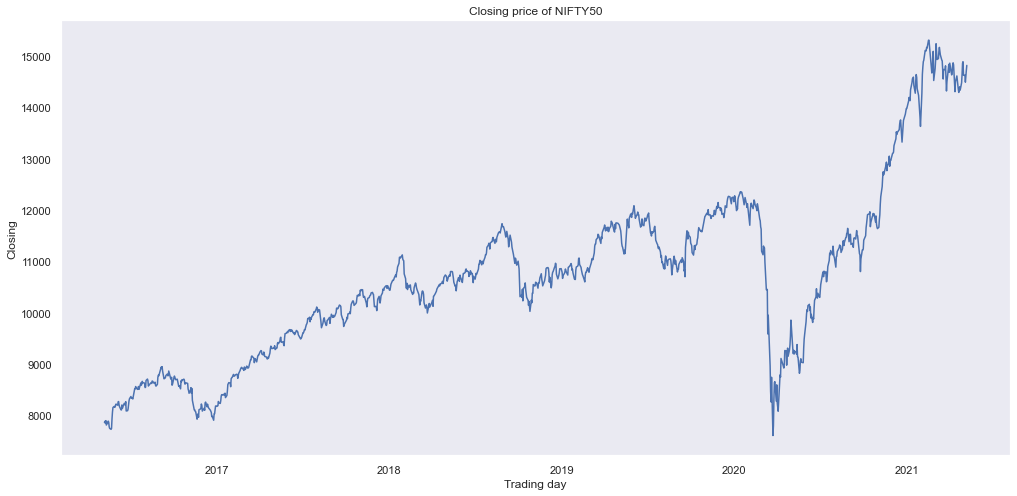

In [146]:
plt.figure(figsize=(17, 8))#Exploratory Data Analysis(EDA)
plt.plot(df1.Close)
plt.title('Closing price of NIFTY50')
plt.ylabel('Closing')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [147]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    


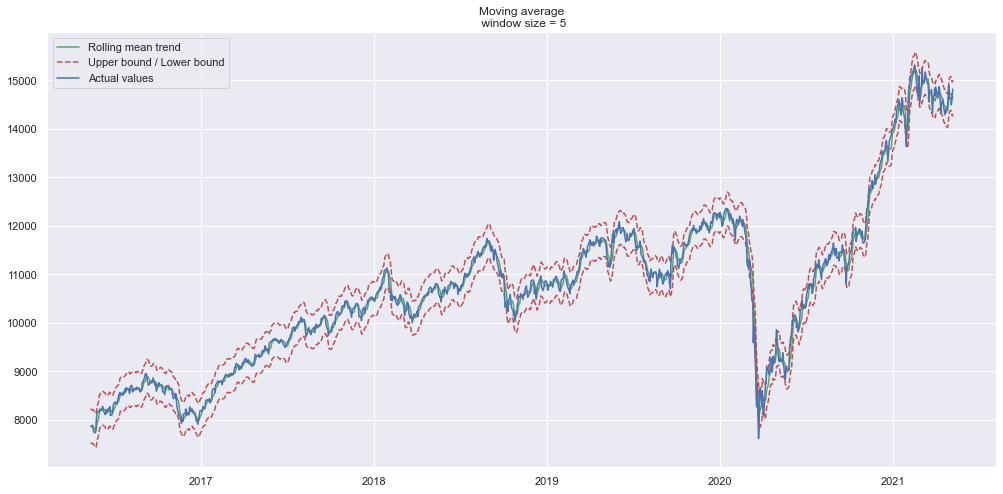

In [148]:
#Smooth by the previous 5 days (by week)
plot_moving_average( df1["Close"], 5 , plot_intervals=True, scale=1.96)

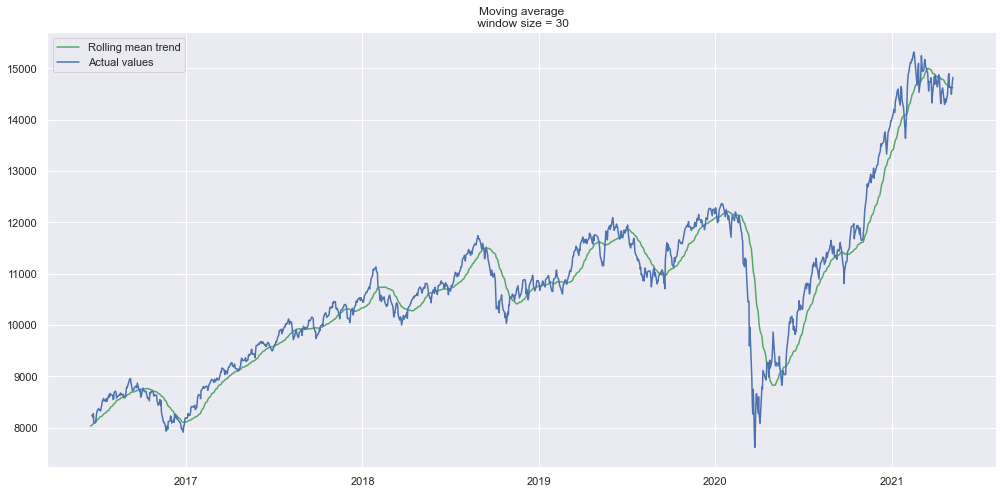

In [149]:
#Smooth by the previous month (30 days)
plot_moving_average(df1.Close, 30)


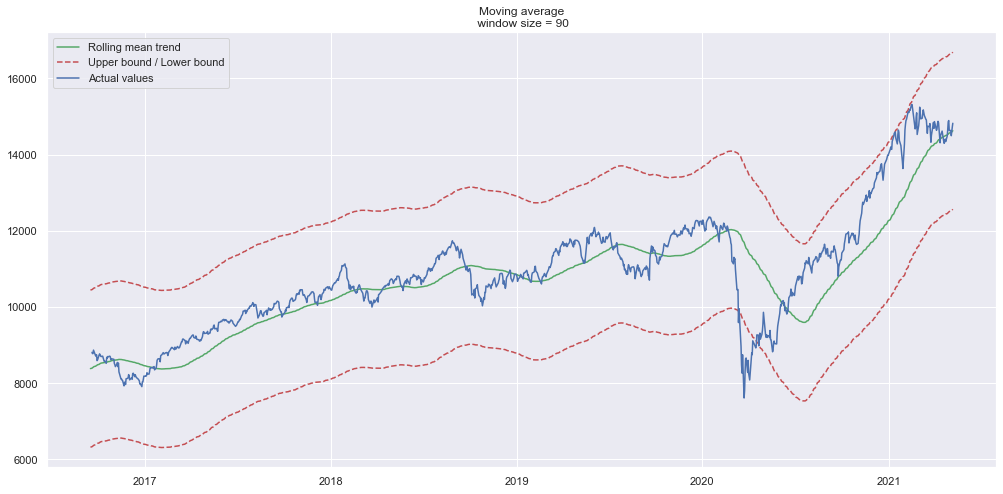

In [150]:
#Smooth by previous quarter (90 days)
plot_moving_average(df1.Close, 90, plot_intervals=True)

In [151]:
def exponential_smoothing(series, alpha):#Exponential Smoothing

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [152]:
exponential_smoothing(df.Close, [0.7, 0.8])

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(20, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

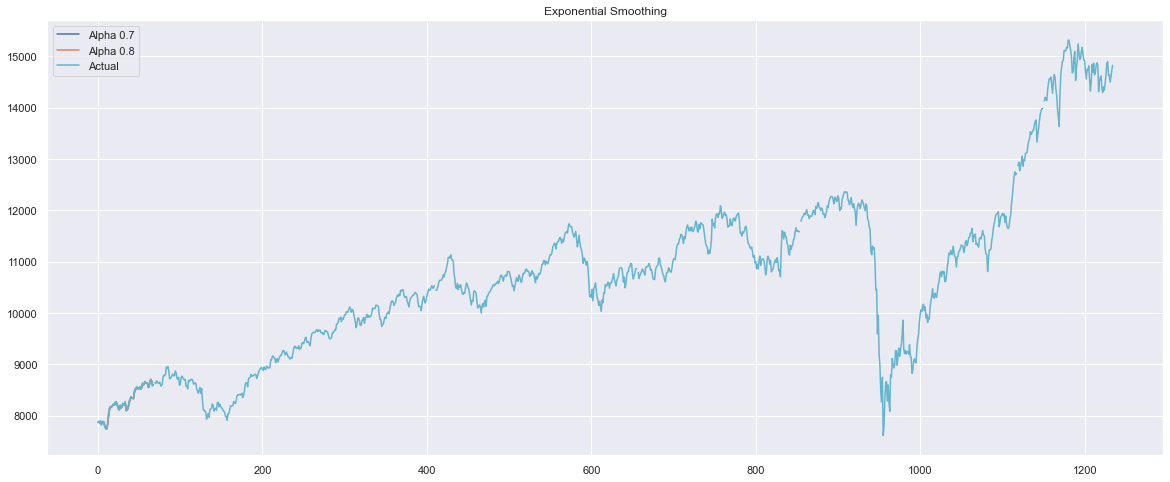

In [153]:
plot_exponential_smoothing(df.Close, [0.7, 0.8])

In [154]:
def double_exponential_smoothing(series, alpha, beta):#Double Exponential Smoothing

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [155]:
def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

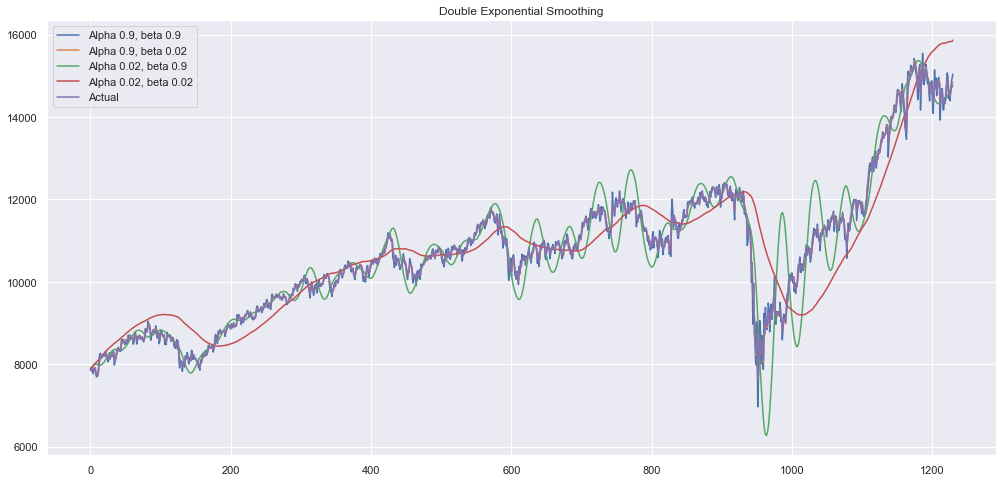

In [156]:
plot_double_exponential_smoothing(df1.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])
